## Problem 1. 
$$\text{minimize} \quad 4 x_1+5 \left | x_2-1 \right| \quad$$

$$\text{subject to} \quad  \left |2x_1\right|+\left|x_2-3\right|\leq5$$

The expression can be reformulated as: 
$$\text{minimize}\quad 4 x_1+5 x_3 \quad$$

$$\text{subject to} \quad x_4 + x_5 \leq 5$$
$$\qquad \qquad \quad x_3 \geq x_2-1 $$
$$\qquad \qquad \quad x_3 \geq -x_2+1 $$
$$\qquad \qquad \quad x_4 \geq 2 x_1 $$
$$\qquad \qquad \quad x_4 \geq -2 x_1 $$
$$\qquad \qquad \quad x_5 \geq  x_2-3 $$
$$\qquad \qquad \quad x_5 \geq -x_2+3 $$

In [58]:
from cvxpy import *
import numpy as np
x1 = Variable()
x2 = Variable()
x3 = Variable()
x4 = Variable()
x5 = Variable()

constraints = [x4 + x5 <= 5,
               x3 >= x2 - 1,
               x3 >= -x2 + 1,
               x4 >= 2*x1,
               x4 >= -2*x1,
               x5 >= x2-3,
               x5 >= -x2+3]

obj = Minimize(4*x1 + 5*x3)

prob = Problem(obj, constraints)
prob.solve(solver='GUROBI')
print ("status of solution:", prob.status)
print ("minimum of objective function =", prob.value)
print ("optimal variables (x1, x2) = ({0}, {1}):".format(x1.value, x2.value))

status of solution: optimal
minimum of objective function = -6.0
optimal variables (x1, x2) = (-1.5, 1.0):


## Problem 2.

**_Formulation:_** 
$$\text{minimize} \quad \sqrt {\sum_{i=1}^{n}\left( \sum_{j=1}^{m}a_{ij}p_{j}-I^*_i \right)^2} $$

$$\text{subject to} \quad p_j \geq 0 \quad \forall j=1\dots m$$

That can be written as:

$$\qquad \text{minimize}\quad   \Vert Ap-I^* \Vert_{l_2}$$

$$\text{subject to} \quad p \geq 0$$

In [59]:
np.random.seed(42)

def Road_lighting(n,m):
    p = Variable(m)

    A = np.random.random((n, m))*10
    I = np.random.random(n)*20+100

    constraints = [p >=0]

    objective = Minimize(norm(A*p-I,2))
    
    # Form and solve problem.
    roadlight = Problem(objective, constraints)
    roadlight.solve(solver ='GUROBI') 
    return roadlight.status, roadlight.value,p.value

status, value, values = Road_lighting(30,20)
print ("status of solution:", status)
print ("optimal variables:\n", values)

status of solution: optimal
optimal variables:
 [[  2.85815316e+00]
 [  2.09036389e+00]
 [  1.90726478e+00]
 [  2.50811997e+00]
 [  1.02331253e+00]
 [  3.29613446e-01]
 [  2.40248419e+00]
 [  7.28267402e-01]
 [  7.24863035e-01]
 [  5.69842504e-08]
 [  1.54581936e-01]
 [  2.83718881e-08]
 [  1.12856138e-09]
 [  9.92531057e-08]
 [  2.01082550e+00]
 [  2.30153888e+00]
 [  8.77214210e-02]
 [  6.81992077e-08]
 [  1.63578892e+00]
 [  1.97354133e-08]]


## Problem 3.


Let:

$(l_1, l_2)$ - hours of assembly labor

$(t_1, t_2)$ - hours of testing

$(m_1, m_2)$ - worth of raw materials

$(p_1, p_2)$ - prices of products

And (variables):

$(x_1, x_2)$ - number of products

#### 1.
We have linear optimization problem:
$$\text{maximize} \quad (p-m)^Tx$$
$$\text{subject to} \quad l^Tx \leq 90$$
$$\qquad \qquad t^Tx \leq 80$$
$$\qquad \quad x \geq 0$$

It is equivalent to:
$$\text{minimize} \quad (m-p)^Tx$$
$$\text{subject to} \quad l^Tx \leq 90$$
$$\qquad \qquad t^Tx \leq 80$$
$$\qquad \quad x \geq 0$$

In [63]:
x = Variable(2)
l = np.asarray([1/4.0, 1/3.0])
t = np.asarray([1/8.0, 1/3.0])
m = np.asarray([1.2, 0.9])
p = np.asarray([9.0, 8.0])
constraints = [x>0, l*x<=90, t*x<=80]

objective = Minimize((m-p)*x)

prob = Problem(objective, constraints)
prob.solve(solver = "GUROBI") 

print ("status of solution:", prob.status)
print ("maximum of objective function =", - prob.value)
print ("optimal variables (n1, n2) = ({0}, {1}):".format(x[0].value, x[1].value))

status of solution: optimal
maximum of objective function = 2808.0
optimal variables (n1, n2) = (360.0, 0.0):


#### 2 (a).
This problem can be reformulated as LP problem in the following way: 

let $\sigma$ be a number of overtime labor ours, then:

$l=(l_1, l_2, -1)$ - hours of assembly labor

$t=(t_1, t_2, 0)$ - hours of testing

$m=(m_1, m_2, 0)$ - worth of raw materials

$p=(p_1, p_2, -7)$ - prices of products

And (variables):

$(x_1, x_2, \sigma)$ - number of products and overtime

let $\sigma$ be a number of overtime labor ours, then:

$$\text{minimize} \quad (m-p)^Tx$$
$$\text{subject to} \quad l^Tx \leq 90$$
$$\qquad \qquad t^Tx \leq 80$$
$$\qquad \quad x \geq 0$$
$$\qquad \quad x_3 \leq 50$$


In [61]:
x = Variable(3)
l = np.asarray([1/4.0, 1/3.0 ,-1.0])
t = np.asarray([1/8.0, 1/3.0, 0.0])
m = np.asarray([1.2, 0.9, 0.0])
p = np.asarray([9.0, 8.0, -7.0])
constraints = [x>=0, l*x<=90, t*x<=80,x[2]<=50]

objective = Minimize((m-p)*x)

prob = Problem(objective, constraints)
prob.solve(solver = "GUROBI") 

print ("status of solution:", prob.status)
print ("maximum of objective function =", - prob.value)
print ("optimal variables (n1, n2, overtime) = ({0}, {1}, {2}):".format(x[0].value, x[1].value, x[2].value))

status of solution: optimal
maximum of objective function = 4018.0
optimal variables (n1, n2, overtime) = (560.0, 0.0, 50.0):


#### 2(b).

It seems hard to incorporate problem into the linear programming formulation. However we can consider problem as two: let $x,y$ - numbers of products in both cases, then:

$$\text{minimize}_{x,y} \quad\min\left\{ \quad (m-p)^Tx, (0.9m-p)^Ty \right\}$$
$$\text{subject to} \quad l^Tx \leq 90, l^Ty \leq 90$$
$$\qquad \qquad t^Tx \leq 80, t^Ty \leq 80$$
$$\qquad \qquad m^Tx \leq 300,m^Ty > 300$$
$$\qquad \quad x \geq 0, y \geq 0$$

This optimization problem can be considered as two different problems (with comparison of results):

In [62]:
#case 1 (no discount)
x = Variable(2)
l = np.asarray([1/4.0, 1/3.0])
t = np.asarray([1/8.0, 1/3.0])
m = np.asarray([1.2, 0.9])
p = np.asarray([9.0, 8.0])

constraints1 = [x>0, l*x<=90, t*x<=80,m*x<=300]
objective1 = Minimize((m-p)*x)
prob1 = Problem(objective1, constraints1)
prob1.solve(solver = "GUROBI") 

#case 2 (discount)
y = Variable(2)
constraints2 = [y>0, l*y<=90, t*y<=80, m*y>300]

objective2 = Minimize((0.9*m-p)*y)

prob2 = Problem(objective2, constraints2)
prob2.solve(solver = "GUROBI") 

print ("maximum of objective function =", - min(prob1.value, prob2.value))
if prob1.value<prob2.value:
    print ("optimal variables (n1, n2) = ({0}, {1}) - without discount:".format(x[0].value, x[1].value))
else:
    print ("optimal variables (n1, n2) = ({0}, {1}) - with discount ".format(y[0].value, y[1].value))    

maximum of objective function = 2851.2
optimal variables (n1, n2) = (360.0, 0.0) - with discount 


## Problem 4.

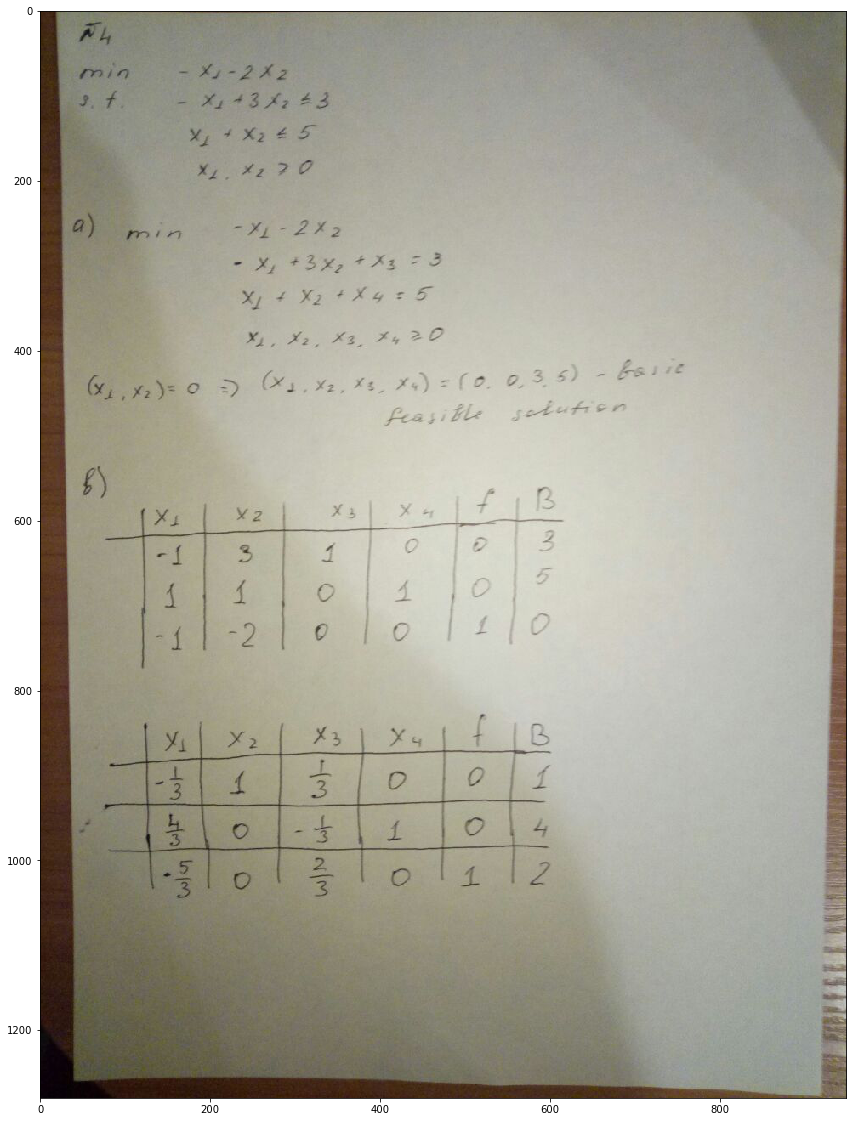

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
%matplotlib inline

plt.figure(figsize = (20,20))
plt.imshow(mpimg.imread('1.jpg'))

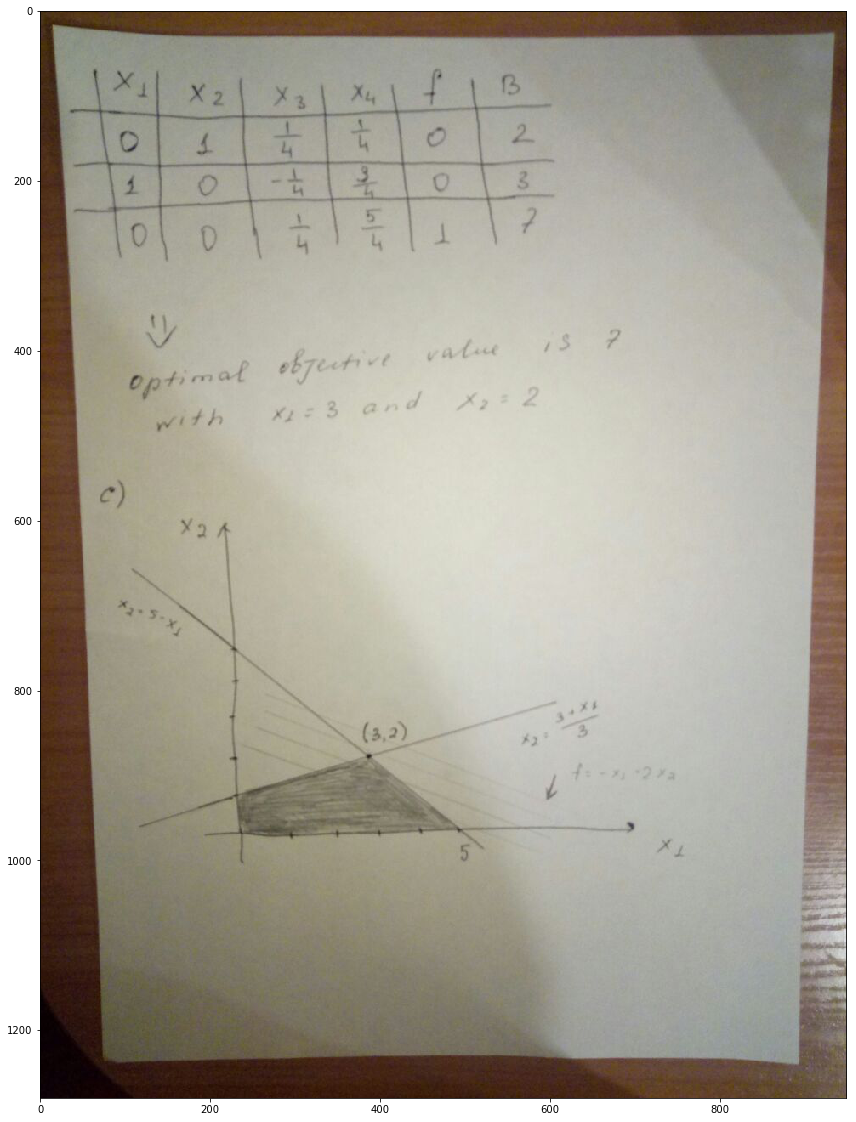

In [74]:
plt.figure(figsize = (20,20))
plt.imshow(mpimg.imread('2.jpg'))